# Access a TIF file from Zenodo

This notebook shows an example how to access a TIF published on the [https://zenodo.org](https://zenodo.org) webpage. 

### Setup
In order to run this notebook, you need to install [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo), following the [README](../README.md).

Note that [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

Now, we first import everything we need:

In [1]:
%%time
from xcube.core.store import new_data_store
from xcube.core.store import get_data_store_params_schema

CPU times: user 3.02 s, sys: 245 ms, total: 3.27 s
Wall time: 1.41 s


First, we get the store parameters needed to initialize a zenodo [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework). 

In [2]:
%%time
store_params = get_data_store_params_schema("zenodo")
store_params

CPU times: user 46.7 ms, sys: 7.05 ms, total: 53.7 ms
Wall time: 52.7 ms


We initialize a new data store using the corresponding record ID, which can be found in the URL of the record: https://zenodo.org/records/8154445.

In [11]:
%%time
store = new_data_store("zenodo", root="8154445")

CPU times: user 4.4 ms, sys: 942 μs, total: 5.34 ms
Wall time: 5.26 ms


The data IDs can be streamed by executing the following cell, which are equal to the filenames in the file section.

In [4]:
%%time
store.list_data_ids()

CPU times: user 18 ms, sys: 1.89 ms, total: 19.9 ms
Wall time: 720 ms


['planet_canopy_cover_30m_v0.1.tif',
 'planet_agb_30m_v0.1.tif',
 'planet_canopy_height_30m_v0.1.tif']

We can describe the dataset using the `describe_data` method, as shown below.  

In [5]:
store.describe_data("planet_canopy_cover_30m_v0.1.tif")

Next we can open the data. We can first view the available opening parameters, which can be added to the `open_data` method in the subsequent cell. 

In [6]:
%%time
open_params = store.get_open_data_params_schema(data_id="planet_canopy_cover_30m_v0.1.tif")
open_params

CPU times: user 209 μs, sys: 0 ns, total: 209 μs
Wall time: 211 μs


In [7]:
%%time
ds = store.open_data(
    "planet_canopy_cover_30m_v0.1.tif",
    tile_size=(1024, 1024),
    data_type="dataset",
)
ds

CPU times: user 85.3 ms, sys: 15 ms, total: 100 ms
Wall time: 99.7 ms


<xarray.Dataset> Size: 25GB
Dimensions:      (x: 170397, y: 149363)
Coordinates:
  * x            (x) float64 1MB 2.555e+06 2.555e+06 ... 7.667e+06 7.667e+06
  * y            (y) float64 1MB 5.82e+06 5.82e+06 ... 1.339e+06 1.339e+06
    spatial_ref  int64 8B 0
Data variables:
    band_1       (y, x) uint8 25GB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
Attributes:
    AREA_OR_POINT:  Area

We plot parts of the opened data as an example below. The data shows the canopy cover fraction within a range of [0, 100]. 

CPU times: user 855 ms, sys: 140 ms, total: 995 ms
Wall time: 4.07 s


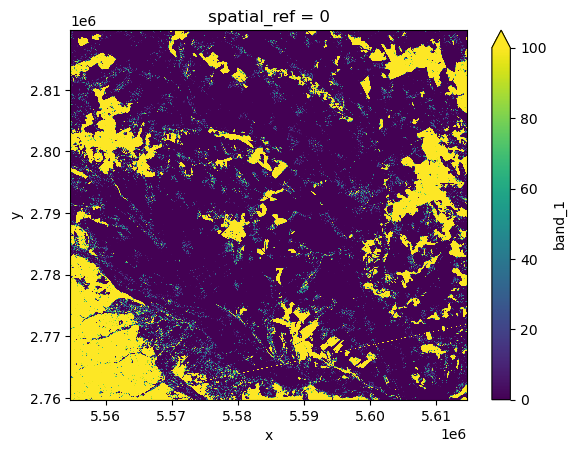

In [8]:
%%time
ds.band_1[100000:102000, 100000:102000].plot(vmin=0, vmax=100)

We can also open a TIFF as a [xcube's multi-resolution  dataset](https://xcube.readthedocs.io/en/latest/mldatasets.html#xcube-multi-resolution-datasets), where we can select the level of resolution. The opened dataset however is not cloud optimized and thus consists of only one level.   

In [9]:
%%time
mlds = store.open_data(
    "planet_canopy_cover_30m_v0.1.tif",
    tile_size=(1024, 1024),
    data_type="mldataset"
)
mlds.num_levels

CPU times: user 4.53 ms, sys: 50 μs, total: 4.58 ms
Wall time: 4.01 ms


1

In [10]:
%%time
ds = mlds.get_dataset(0)
ds

CPU times: user 88.3 ms, sys: 12.9 ms, total: 101 ms
Wall time: 101 ms


<xarray.Dataset> Size: 25GB
Dimensions:      (x: 170397, y: 149363)
Coordinates:
  * x            (x) float64 1MB 2.555e+06 2.555e+06 ... 7.667e+06 7.667e+06
  * y            (y) float64 1MB 5.82e+06 5.82e+06 ... 1.339e+06 1.339e+06
    spatial_ref  int64 8B 0
Data variables:
    band_1       (y, x) uint8 25GB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
Attributes:
    AREA_OR_POINT:  Area